In [1]:
import positenc
import numpy as np
np.random.seed(42)
max_length = 3
d_model = 16
obj = positenc.PositionalEncoding(max_length=max_length, d_model=d_model)
emb = np.random.rand(max_length, d_model)
pe = obj.encode(emb)
print(emb)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
  0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914 0.61185289 0.13949386
  0.29214465 0.36636184 0.45606998 0.78517596 0.19967378 0.51423444
  0.59241457 0.04645041 0.60754485 0.17052412]
 [0.06505159 0.94888554 0.96563203 0.80839735 0.30461377 0.09767211
  0.68423303 0.44015249 0.12203823 0.49517691 0.03438852 0.9093204
  0.25877998 0.66252228 0.31171108 0.52006802]]


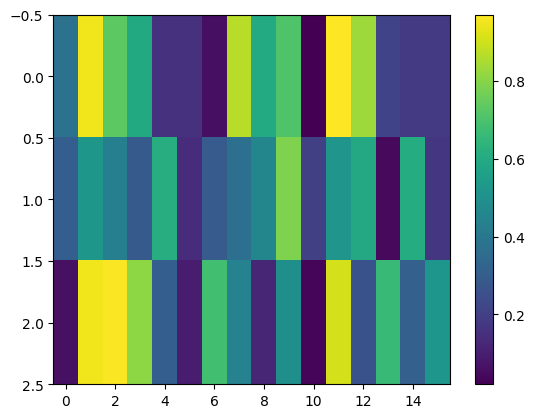

In [2]:
import matplotlib.pyplot as plt
# emb.shape
em = plt.imshow(emb, aspect="auto")
plt.colorbar(em)


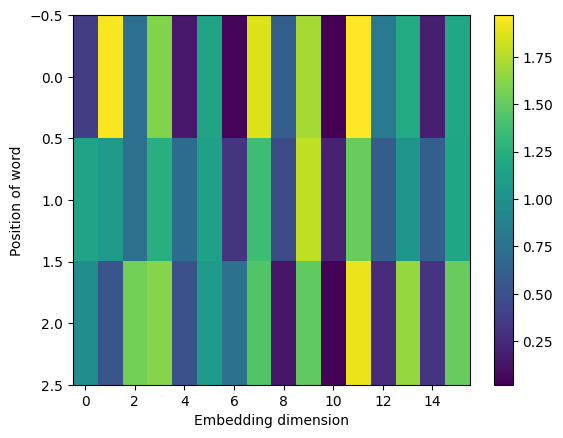

In [3]:

im = plt.imshow(pe, aspect="auto")
plt.xlabel("Embedding dimension")
plt.ylabel("Position of word")
plt.colorbar(im)

In [4]:
import selfAttention
import torch
torch.manual_seed(42)
att = selfAttention.SelfAttention(d_model)
emb = torch.from_numpy(pe)
emb.dtype
# att.float()
z, s = att.forward(emb.float())
z = z.detach().numpy()
s = s.detach().numpy()
print(z.shape)

(3, 16)


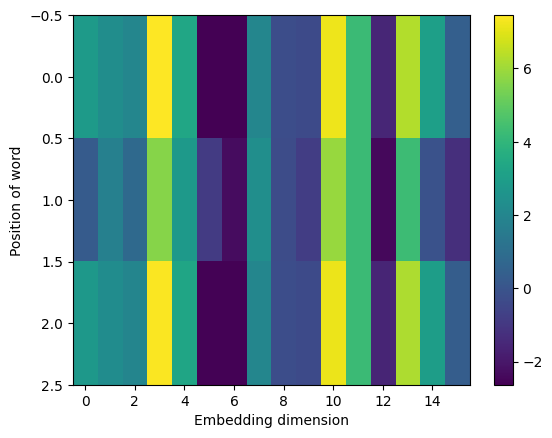

In [5]:
ze = plt.imshow(z, aspect="auto")
plt.xlabel("Embedding dimension")
plt.ylabel("Position of word")
plt.colorbar(ze)

(3, 3)


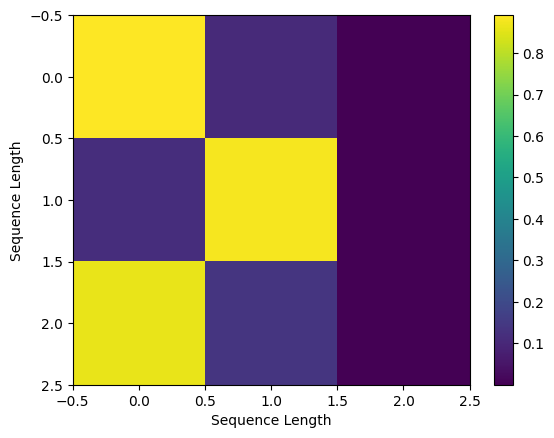

In [6]:
ze = plt.imshow(s, aspect="auto")
plt.xlabel("Sequence Length")
plt.ylabel("Sequence Length")
plt.colorbar(ze)
print(s.shape)

In [7]:
np.set_printoptions(precision=2)
# x = np.arange(1, 9).reshape(1, 8)
# A = np.arange(1, 8*8*3 + 1).reshape(8,  8*3) // 64
# y = x @ A
y = np.arange(1, 49).reshape(2, 3*8)
# y = np.arange(1, 25).reshape(1, 24)
print(y.shape)
print(*y, sep="\n")

(2, 24)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


In [8]:
y = y.reshape(2, 3, 4, 8//4) # (sequence_length, qkv, heads, 3*dim_k)
# y = y.reshape(1, 3, 4, 8//4) # (sequence_length, qkv, heads, dk_dv)

print(y)
y = y.transpose(2, 1, 0, -1) # (heads, qkv, sequence_length, 3*dk_dv)
q, k, v = np.split(y, 3, axis=1)
print(y)

[[[[ 1  2]
   [ 3  4]
   [ 5  6]
   [ 7  8]]

  [[ 9 10]
   [11 12]
   [13 14]
   [15 16]]

  [[17 18]
   [19 20]
   [21 22]
   [23 24]]]


 [[[25 26]
   [27 28]
   [29 30]
   [31 32]]

  [[33 34]
   [35 36]
   [37 38]
   [39 40]]

  [[41 42]
   [43 44]
   [45 46]
   [47 48]]]]
[[[[ 1  2]
   [25 26]]

  [[ 9 10]
   [33 34]]

  [[17 18]
   [41 42]]]


 [[[ 3  4]
   [27 28]]

  [[11 12]
   [35 36]]

  [[19 20]
   [43 44]]]


 [[[ 5  6]
   [29 30]]

  [[13 14]
   [37 38]]

  [[21 22]
   [45 46]]]


 [[[ 7  8]
   [31 32]]

  [[15 16]
   [39 40]]

  [[23 24]
   [47 48]]]]


In [22]:
# y1 = np.arange(1, 2*512+1).reshape(2, 512)
y1 = np.arange(1, 49).reshape(2, 3*8)

y1 = y1.reshape(2, 4, 3*(8//4)) # (sequence_length, heads, 3*dim_k)
# y = y.reshape(1, 3, 4, 8//4) # (sequence_length, qkv, heads, dk_dv)

print(y1)
y1 = y1.transpose(1, 0, -1) # (heads, sequence_length, 3*dk_dv)
q1, k1, v1 = np.split(y1, 3, axis=-1)
print(y1)

[[[ 1  2  3  4  5  6]
  [ 7  8  9 10 11 12]
  [13 14 15 16 17 18]
  [19 20 21 22 23 24]]

 [[25 26 27 28 29 30]
  [31 32 33 34 35 36]
  [37 38 39 40 41 42]
  [43 44 45 46 47 48]]]
[[[ 1  2  3  4  5  6]
  [25 26 27 28 29 30]]

 [[ 7  8  9 10 11 12]
  [31 32 33 34 35 36]]

 [[13 14 15 16 17 18]
  [37 38 39 40 41 42]]

 [[19 20 21 22 23 24]
  [43 44 45 46 47 48]]]


In [10]:

q = q.squeeze()
k = k.squeeze()
v = v.squeeze()
print(q)
print(q.shape)
print(k)
print(v)
# q = q.squeeze().transpose(1, 0, 2)
# k = k.squeeze().transpose(1, 0, 2)
# print(q.shape, k.shape, v.shape)

[[[ 1  2]
  [25 26]]

 [[ 3  4]
  [27 28]]

 [[ 5  6]
  [29 30]]

 [[ 7  8]
  [31 32]]]
(4, 2, 2)
[[[ 9 10]
  [33 34]]

 [[11 12]
  [35 36]]

 [[13 14]
  [37 38]]

 [[15 16]
  [39 40]]]
[[[17 18]
  [41 42]]

 [[19 20]
  [43 44]]

 [[21 22]
  [45 46]]

 [[23 24]
  [47 48]]]


In [23]:

q1 = q1.squeeze()
k1 = k1.squeeze()
v1 = v1.squeeze()
print(q1)
print(q1.shape)
print(k1)
print(v1)

[[[ 1  2]
  [25 26]]

 [[ 7  8]
  [31 32]]

 [[13 14]
  [37 38]]

 [[19 20]
  [43 44]]]
(4, 2, 2)
[[[ 3  4]
  [27 28]]

 [[ 9 10]
  [33 34]]

 [[15 16]
  [39 40]]

 [[21 22]
  [45 46]]]
[[[ 5  6]
  [29 30]]

 [[11 12]
  [35 36]]

 [[17 18]
  [41 42]]

 [[23 24]
  [47 48]]]


In [12]:
att = np.matmul(q, k.transpose(0, -1, -2))
att

array([[[  29,  101],
        [ 485, 1709]],

       [[  81,  249],
        [ 633, 1953]],

       [[ 149,  413],
        [ 797, 2213]],

       [[ 233,  593],
        [ 977, 2489]]])

In [24]:
np.matmul(q1, k1.transpose(0, -1, -2))

array([[[  11,   83],
        [ 179, 1403]],

       [[ 143,  503],
        [ 599, 2111]],

       [[ 419, 1067],
        [1163, 2963]],

       [[ 839, 1775],
        [1871, 3959]]])

In [14]:
import multihead

ml = multihead.Multihead(d_model, d_model, 4)

In [15]:
print(emb.shape)
softmax, values =  ml.forward(emb[None, ::].to(torch.float32))

torch.Size([3, 16])
torch.Size([1, 3, 48])
torch.Size([1, 3, 3, 4, 4])
torch.Size([1, 4, 3, 3, 4])
torch.Size([1, 4, 1, 3, 4]) torch.Size([1, 4, 1, 3, 4])


In [16]:
print(softmax.shape)

torch.Size([1, 4, 1, 3, 3])


In [17]:
s = torch.randn(2, 3)
print(s)
s.transpose(1, 0)

tensor([[-0.6259,  0.5887, -1.7912],
        [ 0.1224,  1.7314, -0.4992]])


tensor([[-0.6259,  0.1224],
        [ 0.5887,  1.7314],
        [-1.7912, -0.4992]])

In [18]:
s.transpose(-2, -1)


tensor([[-0.6259,  0.1224],
        [ 0.5887,  1.7314],
        [-1.7912, -0.4992]])

In [19]:
s.transpose(-1, -2)

tensor([[-0.6259,  0.1224],
        [ 0.5887,  1.7314],
        [-1.7912, -0.4992]])

In [20]:
torch.matmul(q, k.transpose(-1, -2))

ValueError: axes don't match array